# Learning and Decision Making

## Homework 4

#### (a)

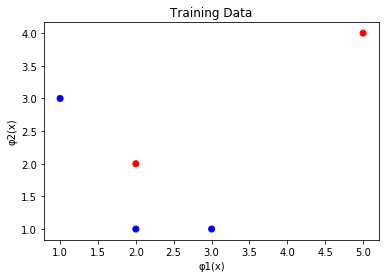

Os pontos não são linearmente separáveis, pois não é possível traçar uma recta que divida os pontos de acordo com a sua classe corretamente.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = [1, 2, 2, 3, 5]
y = [3, 2, 1, 1, 4]
classAttr = [0, 1, 0, 0, 1]

df = pd.DataFrame(dict(x=x, y=y, classattr=classAttr))

fig, ax = plt.subplots()

colors = {0: 'blue', 1: 'red'}
ax.scatter(df['x'], df['y'], c=df['classattr'].apply(lambda x: colors[x]))

plt.xlabel("φ1(x)")
plt.ylabel("φ2(x)")
plt.title("Training Data")
plt.show()

print("Os pontos não são linearmente separáveis, pois não é possível traçar uma recta que divida os pontos de acordo"\
      " com a sua classe corretamente.")

#### (b)

In [38]:
from math import exp 

def calcPi(point,weights):
    pi = weights[0]
    
    for i in range(len(point)-1):
        pi += weights[i + 1] * point[i]
    
    return 1.0/(1.0 + exp(-pi))

def calcWeights(data):
    alpha = 1
    weights = [0.0 for i in range(len(data[0]))]
    
    for point in data:
        pi = calcPi(point,weights)
        
        weights[0] += alpha * (point[2] - pi) * pi * (1 - pi)
        
        for i in range(0, len(point)-1):
            weights[i + 1] += alpha * (point[2] - pi) * pi * (1 - pi) * point[i]     
            
    return weights

data = zip(x,y,classAttr)
data = list(data)
updatedWeights = calcWeights(data)
print(updatedWeights)

[-0.15566362061593841, -0.14056196132121454, -0.14791074869132217]


#### (c)

In [23]:
from math import exp
 
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    print(yhat)
    return 1.0 / (1.0 + exp(-yhat))
 
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef
 
# Calculate coefficients
dataset = [[1,3,0],
	[2,2,1],
	[2,1,0],
	[3,1,0],
	[5,4,1]]
l_rate = 1
n_epoch = 1
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

0.0
-1.125
0.22771187402437032
-0.7169994283442241
-3.103232880883186
>epoch=0, lrate=1.000, error=2.153
[-0.15566362061593841, -0.14056196132121454, -0.14791074869132217]
